In [124]:
include("neural_network_many_load_sim.jl")

train_model (generic function with 1 method)

In [125]:
using PythonPlot
function plot_correlations(model_preds, Y_test, param_names, axes)
    
    n_vars = length(param_names)

    for i in 1:n_vars
        for j in 1:n_vars
            if i == j
                # axes[i-1, j-1].hist(model_preds[i, :], bins = 20)
                axes[i-1, j-1].scatter(Y_test[i, :], model_preds[i, :], alpha = .1)
                corr_value = round(cor(Y_test[i, :], model_preds[i, :]), digits = 2)
                

                axes[i-1,j-1].set_title("$(param_names[i]) r =$(corr_value)", fontsize = 10)
                axes[i-1,j-1].set_xlabel("True")
                axes[i-1,j-1].set_ylabel("Predicted")
            else
                corr_value = round(cor(model_preds[i, :], model_preds[j, :]), digits = 2)

                axes[i-1, j-1].scatter(model_preds[j, :], model_preds[i, :], alpha = .05)
                axes[i-1, j-1].set_title("r = $(corr_value)")
                axes[i-1, j-1].set_xlabel(param_names[j])
                axes[i-1, j-1].set_ylabel(param_names[i])
            end
        end
    end
end


# compute correlations between the true and predicted values
function compute_correlations(model_preds, Y_test, param_names)
    n_vars = length(param_names)
    corrs = zeros(n_vars)
    for i in 1:n_vars
        corrs[i] = round(cor(Y_test[i, :], model_preds[i, :]), digits = 2)
    end
    return corrs
end



compute_correlations (generic function with 1 method)

Progress: 100%|█████████████████████████████████████████| Time: 0:12:47


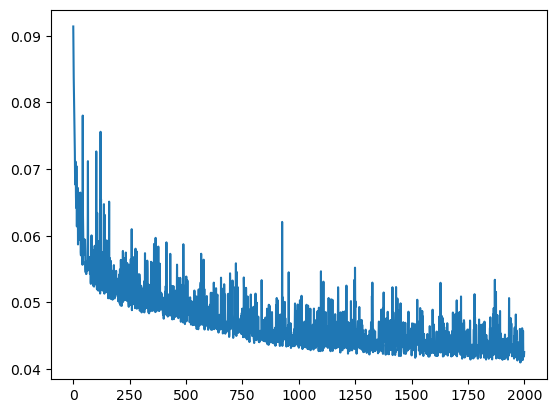

Python: [<matplotlib.lines.Line2D object at 0x423721c10>]

In [173]:
data_loader, X_test, Y_test = prep_data_train_test(eps_vals, q_vals, NT_vals, mem_slopes; train_prop = 0.85, batch_size = 32)
model, test_losses = train_model(64, .001, 2000, data_loader, X_test, Y_test)

# plot test_losses
fig, ax = subplots()
ax.plot(test_losses)

In [105]:
first(data_loader)

(Float32[0.70036304 0.6393596 … 0.67249537 0.7896044; 0.654205 0.5926349 … 0.62112635 0.7160457; … ; 0.5628694 0.5354821 … 0.73189694 0.895449; 0.5662862 0.5286335 … 0.69811445 0.8859543], Float32[0.46 0.14 … 0.34 0.74; 0.96 0.94 … 0.62 0.68; 1.0 0.0625 … 0.25 0.125; 0.025 0.05 … 0.025 0.025])

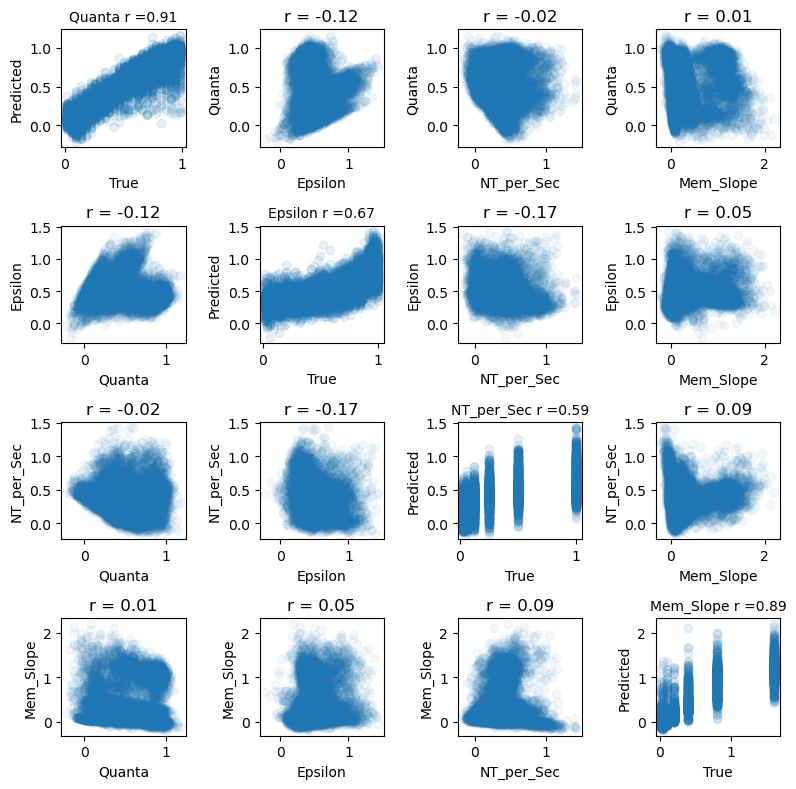

In [182]:
# plot recovery
n_trials = 1000

X_test_sampled = generate_binomial_samples(X_test, n_trials)
model_preds = model(X_test_sampled)

param_names = ["Quanta", "Epsilon", "NT_per_Sec", "Mem_Slope"]

n_vars = 4

fig, axes = subplots(n_vars, n_vars, figsize=(2*n_vars, 2*n_vars), tight_layout = true)
plot_correlations(model_preds, Y_test, param_names, axes)


Progress: 100%|█████████████████████████████████████████| Time: 0:01:40


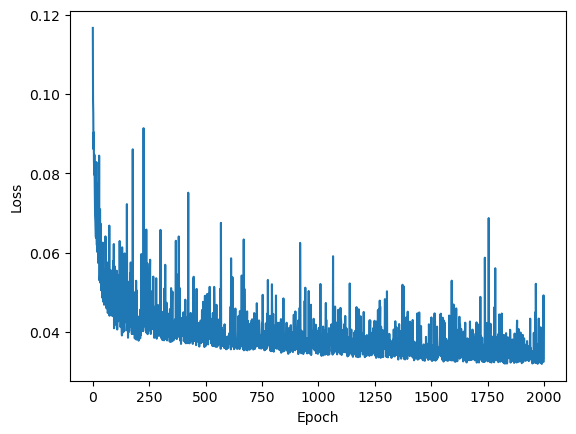

Python: Text(24.000000000000007, 0.5, 'Loss')

In [170]:
# refit the model on data, holding NT_per_Sec constant at 100

this_NT_val = 200
data_loader, X_test, Y_test = prep_data_train_test(eps_vals, q_vals, [this_NT_val], mem_slopes; train_prop = 0.85, batch_size = 32)
model, test_losses = train_model(50, .001, 2000, data_loader, X_test, Y_test)

# plot test_losses
fig, ax = subplots()
ax.plot(test_losses)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

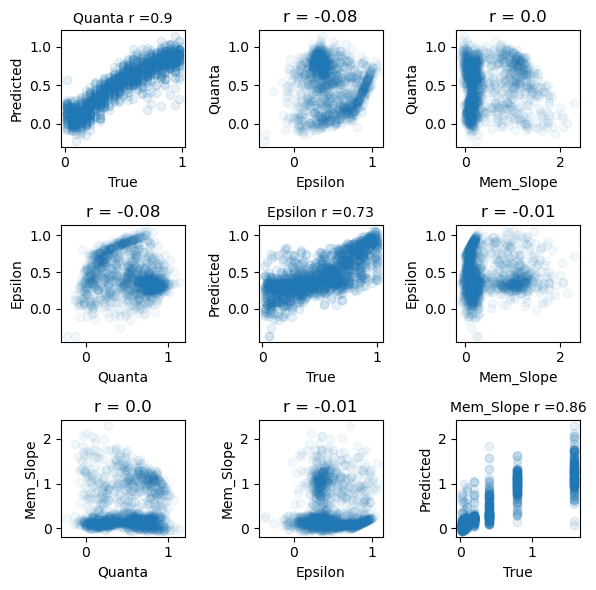

In [172]:
n_trials = 200
X_test_sampled = generate_binomial_samples(X_test, n_trials)

#X_test_sampled = X_test_sampled[:,1:100]
model_preds = model(X_test_sampled)

n_vars = 3

param_names = ["Quanta", "Epsilon", "Mem_Slope"]

fig, axes = subplots(n_vars, n_vars, figsize=(2*n_vars, 2*n_vars), tight_layout = true)
plot_correlations(model_preds, Y_test, param_names, axes)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:17


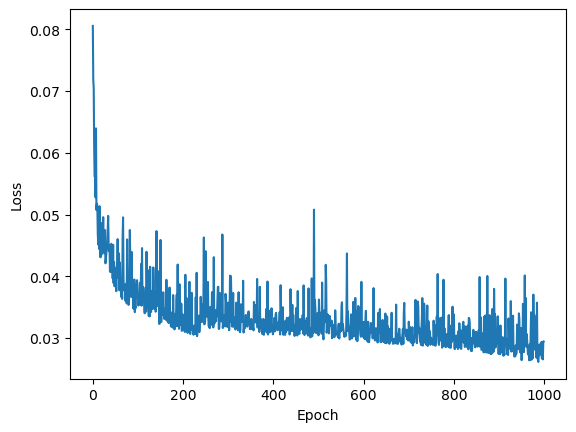

Python: Text(24.000000000000007, 0.5, 'Loss')

In [158]:
# refit the model on data, holding NT_per_Sec constant at 100

this_mem_slope = .2
these_eps_vals = eps_vals[eps_vals .> 0]
data_loader, X_test, Y_test = prep_data_train_test(these_eps_vals, q_vals, NT_vals, [this_mem_slope]; train_prop = 0.85, batch_size = 32)
model, test_losses = train_model(16, .001, 1000, data_loader, X_test, Y_test)

# plot test_losses
fig, ax = subplots()
ax.plot(test_losses)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

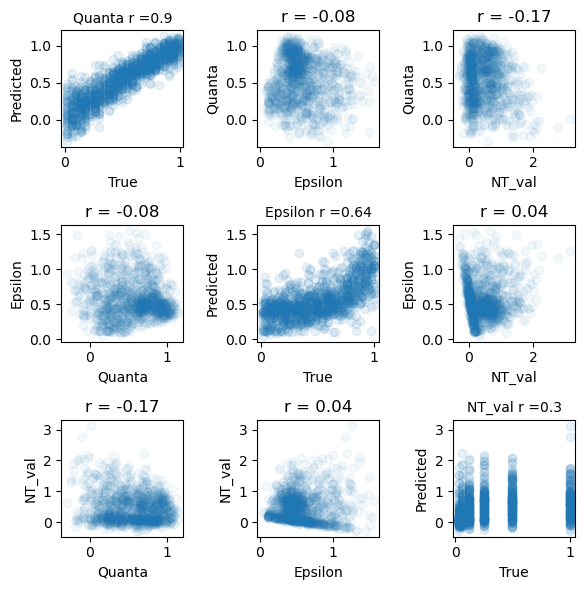

In [162]:
n_trials = 20
X_test_sampled = generate_binomial_samples(X_test, n_trials)

#X_test_sampled = X_test_sampled[:,1:100]
model_preds = model(X_test_sampled)

n_vars = 3

param_names = ["Quanta", "Epsilon", "NT_val"]

fig, axes = subplots(n_vars, n_vars, figsize=(2*n_vars, 2*n_vars), tight_layout = true)
plot_correlations(model_preds, Y_test, param_names, axes)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


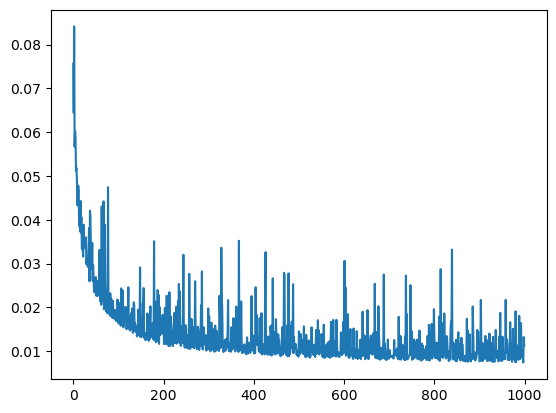

Python: [<matplotlib.lines.Line2D object at 0x3d2a19350>]

In [62]:
this_NT_val = 100
this_mem_slope = .2
data_loader, X_test, Y_test = prep_data_train_test(eps_vals, q_vals, [this_NT_val], [this_mem_slope]; train_prop = 0.85, batch_size = 32)
model, test_losses = train_model(16, .001, 1000, data_loader, X_test, Y_test)

# plot test_losses
fig, ax = subplots()
ax.plot(test_losses)

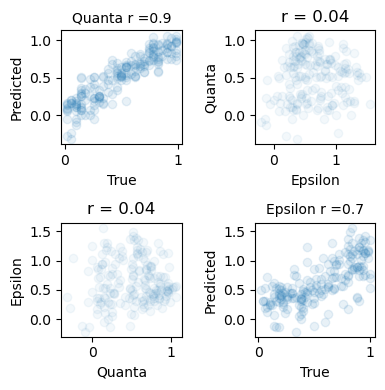

In [63]:
n_trials = 20
X_test_sampled = generate_binomial_samples(X_test, n_trials)

#X_test_sampled = X_test_sampled[:,1:100]
model_preds = model(X_test_sampled)

n_vars = 2

param_names = ["Quanta", "Epsilon"]

fig, axes = subplots(n_vars, n_vars, figsize=(2*n_vars, 2*n_vars), tight_layout = true)
plot_correlations(model_preds, Y_test, param_names, axes)

In [93]:
## suppose you mis-specify the hyper-parameters... 
all_eps_corrs = zeros(N_NT, N_ms)
all_q_corrs = zeros(N_NT, N_ms)


6×7 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


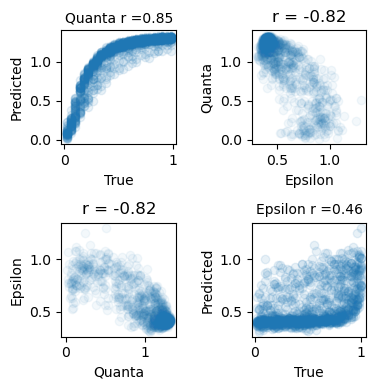

2-element Vector{Float64}:
 0.8500000238418579
 0.46000000834465027

In [121]:


this_NT_val_A = 200
this_mem_slope_A = .1

this_NT_val_B = 100
this_mem_slope_B = .4

# laod data for both A and B seperately
data_loader_A, X_test_A, Y_test_A = prep_data_train_test(eps_vals, q_vals, [this_NT_val_A], [this_mem_slope_A]; train_prop = .95, batch_size = 32)
data_loader_B, X_test_B, Y_test_B = prep_data_train_test(eps_vals, q_vals, [this_NT_val_B], [this_mem_slope_B]; train_prop = 0.1, batch_size = 32)

# train model on A
model_A, test_losses_A = train_model(16, .001, 1000, data_loader_A, X_test_A, Y_test_A)

# test model on B
n_trials = 200
X_test_sampled_B = generate_binomial_samples(X_test_B, n_trials)
model_preds_B = model_A(X_test_sampled_B)
# plot correlations for B
n_vars = 2
param_names = ["Quanta", "Epsilon"]
# plot it
fig, axes = subplots(n_vars, n_vars, figsize=(2*n_vars, 2*n_vars), tight_layout = true)
plot_correlations(model_preds_B, Y_test_B, param_names, axes)
q_corr, eps_corr = compute_correlations(model_preds_B, Y_test_B, param_names)


In [90]:
# pick a random value for NT and mem_slope and epsilon and n quanta
this_NT_val = 100
this_mem_slope = .2
this_eps = .2


0.5799999833106995